# Crime dataset 
## General info:
### Source: Official Mexican Government Open Data Platform  
### Timeframe: January 2015 - December 2024  
### Origin: [“Datos Abiertos de Incidencia Delictiva”](https://www.gob.mx/sesnsp/acciones-y-programas/datos-abiertos-de-incidencia-delictiva).

In [2]:
#Loading libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Loading the Main dataset 
crimen = pd.read_csv("IDEFC_NM_Dec 2024.csv", encoding="latin1")

In [3]:
#Genral cleaning of the dataset
#Check number of rows and columns 
print(crimen.shape)  
#Checking for missing values 
print(crimen.isnull().sum())
#Checking data NA in the months
print(crimen[["Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"]].isnull().sum())
print(crimen.dtypes)

(31360, 20)
Año                       0
Clave_Ent                 0
Entidad                   0
Bien jurídico afectado    0
Tipo de delito            0
Subtipo de delito         0
Modalidad                 0
Enero                     0
Febrero                   0
Marzo                     0
Abril                     0
Mayo                      0
Junio                     0
Julio                     0
Agosto                    0
Septiembre                0
Octubre                   0
Noviembre                 0
Diciembre                 0
Total Delitos             0
dtype: int64
Julio         0
Agosto        0
Septiembre    0
Octubre       0
Noviembre     0
Diciembre     0
dtype: int64
Año                        int64
Clave_Ent                  int64
Entidad                   object
Bien jurídico afectado    object
Tipo de delito            object
Subtipo de delito         object
Modalidad                 object
Enero                      int64
Febrero                    int64
Marzo    

# Poverty indicators, 2008–2018 (National and state-level) 
## General info:
### Source: Official Mexican Government Open Data Platform  
### Timeframe:  2008 to 2018
### Origin: [“Datos Abiertos de Incidencia Delictiva”](https://datos.gob.mx/busca/dataset/indicadores-de-pobreza-2008-2018-nacional-y-estatal).
#### This dataset provides state-level information on healthcare, education, and poverty from 2008 to 2018

In [5]:
#Loading the dataset
poverty = pd.read_csv("C6_Indicadores_carencia_social_por_estado_numero_personas_08_18.csv", encoding="latin1")

#Cleaning the 'Entidad' column in both datasets so it could be unified.
poverty.rename(columns={"estado_1": "Entidad"}, inplace=True)
crimen['Entidad'] = crimen['Entidad'].str.strip()
poverty['Entidad'] = poverty['Entidad'].str.replace("_", " ").str.title().str.strip()

In [6]:
# Checking the unique values in both datasets after cleaning regarding the names of the entities.
print(poverty['Entidad'].unique())
print(crimen['Entidad'].unique())

['Aguascalientes' 'Baja California' 'Baja California Sur' 'Campeche'
 'Coahuila' 'Colima' 'Chiapas' 'Chihuahua' 'Ciudad De Mexico' 'Durango'
 'Guanajuato' 'Guerrero' 'Hidalgo' 'Jalisco' 'Mexico' 'Michoacan'
 'Morelos' 'Nayarit' 'Nuevo Leon' 'Oaxaca' 'Puebla' 'Queretaro'
 'Quintana Roo' 'San Luis Potosi' 'Sinaloa' 'Sonora' 'Tabasco'
 'Tamaulipas' 'Tlaxcala' 'Veracruz' 'Yucatan' 'Zacatecas'
 'Estados Unidos Mexicanos']
['Aguascalientes' 'Baja California' 'Baja California Sur' 'Campeche'
 'Coahuila de Zaragoza' 'Colima' 'Chiapas' 'Chihuahua' 'Ciudad de México'
 'Durango' 'Guanajuato' 'Guerrero' 'Hidalgo' 'Jalisco' 'México'
 'Michoacán de Ocampo' 'Morelos' 'Nayarit' 'Nuevo León' 'Oaxaca' 'Puebla'
 'Querétaro' 'Quintana Roo' 'San Luis Potosí' 'Sinaloa' 'Sonora' 'Tabasco'
 'Tamaulipas' 'Tlaxcala' 'Veracruz de Ignacio de la Llave' 'Yucatán'
 'Zacatecas']


In [7]:
# Recoding the entities name that differs
entities_names= {
    "Coahuila": "Coahuila de Zaragoza",
    "Ciudad De Mexico": "Ciudad de México",
    "Mexico": "México",
    "Michoacan": "Michoacán de Ocampo",
    "Nuevo Leon": "Nuevo León",
    "Queretaro": "Querétaro",
    "San Luis Potosi": "San Luis Potosí",
    "Veracruz": "Veracruz de Ignacio de la Llave",
    "Yucatan": "Yucatán",
    "Estados Unidos Mexicanos": None  # Usamos None para eliminar estos valores
}
# Apply the unified names 
poverty['Entidad'] = poverty['Entidad'].replace(entities_names)

print(poverty['Entidad'].unique())
print(crimen['Entidad'].unique())

['Aguascalientes' 'Baja California' 'Baja California Sur' 'Campeche'
 'Coahuila de Zaragoza' 'Colima' 'Chiapas' 'Chihuahua' 'Ciudad de México'
 'Durango' 'Guanajuato' 'Guerrero' 'Hidalgo' 'Jalisco' 'México'
 'Michoacán de Ocampo' 'Morelos' 'Nayarit' 'Nuevo León' 'Oaxaca' 'Puebla'
 'Querétaro' 'Quintana Roo' 'San Luis Potosí' 'Sinaloa' 'Sonora' 'Tabasco'
 'Tamaulipas' 'Tlaxcala' 'Veracruz de Ignacio de la Llave' 'Yucatán'
 'Zacatecas' None]
['Aguascalientes' 'Baja California' 'Baja California Sur' 'Campeche'
 'Coahuila de Zaragoza' 'Colima' 'Chiapas' 'Chihuahua' 'Ciudad de México'
 'Durango' 'Guanajuato' 'Guerrero' 'Hidalgo' 'Jalisco' 'México'
 'Michoacán de Ocampo' 'Morelos' 'Nayarit' 'Nuevo León' 'Oaxaca' 'Puebla'
 'Querétaro' 'Quintana Roo' 'San Luis Potosí' 'Sinaloa' 'Sonora' 'Tabasco'
 'Tamaulipas' 'Tlaxcala' 'Veracruz de Ignacio de la Llave' 'Yucatán'
 'Zacatecas']


In [8]:
#Selecting only the 2018 data from the poverty dataset, as it is the only year that coincides with the crime dataset.
poverty_2018 = poverty[[
    "Entidad",
    "miles_de_personas_con_carencia_por_acceso_a_los_servicios_de_salud_2018",
    "miles_de_personas_con_ingreso_inferior_a_la_linea_de_pobreza_por_ingresos_2018",
    "miles_de_personas_con_ingreso_inferior_a_la_linea_de_pobreza_extrema_por_ingresos_2018",
    "miles_de_personas_con_carencia_en_rezago_educativo_2018",
    "miles_de_personas_con_carencia_por_acceso_a_la_seguridad_social_2018",
    "miles_de_personas_con_carencia_por_calidad_y_espacios_de_la_vivienda_2018",
    "miles_de_personas_con_carencia_por_acceso_a_los_servicios_basicos_de_la_vivienda_2018"
]].copy()

# Rename columns for clarity
poverty_2018.rename(columns={
    "miles_de_personas_con_carencia_por_acceso_a_los_servicios_de_salud_2018": "Sin acceso a salud",
    "miles_de_personas_con_ingreso_inferior_a_la_linea_de_pobreza_por_ingresos_2018": "Pobreza",
    "miles_de_personas_con_ingreso_inferior_a_la_linea_de_pobreza_extrema_por_ingresos_2018":"Extreme Poverty",
    "miles_de_personas_con_carencia_en_rezago_educativo_2018": "Educational Lag",
    "miles_de_personas_con_carencia_por_acceso_a_la_seguridad_social_2018":"Lacking_social_security",
    "miles_de_personas_con_carencia_por_calidad_y_espacios_de_la_vivienda_2018":"Lacking_housing_quality",
    "miles_de_personas_con_carencia_por_acceso_a_los_servicios_basicos_de_la_vivienda_2018":"Lacking_basic_housing_services"
}, inplace=True)


In [9]:
# Filtering crime dataset for 2018 
if "Año" in crimen.columns:
    crimen_2018 = crimen[crimen["Año"] == 2018]
else:
    crimen_2018 = crimen  

# Aggregate total crimes per state
crime_by_state = crimen_2018.groupby("Entidad")["Total Delitos"].sum().reset_index()

# Check for missing "Entidad" values before merge
missing_in_crime = set(poverty_2018["Entidad"]) - set(crimen_2018["Entidad"])
missing_in_poverty = set(crimen_2018["Entidad"]) - set(poverty_2018["Entidad"])

if missing_in_crime:
    print(f"Missing in crime dataset: {missing_in_crime}")
if missing_in_poverty:
    print(f"Missing in poverty dataset: {missing_in_poverty}")

# Merge datasets
merged_df = pd.merge(crime_by_state, poverty_2018, on="Entidad", how="inner")

# Convert columns to numeric
merged_df["Total_Delitos"] = pd.to_numeric(merged_df["Total Delitos"], errors="coerce")
merged_df["Pobreza"] = pd.to_numeric(merged_df["Pobreza"], errors="coerce")
merged_df["Sin acceso a salud"] = pd.to_numeric(merged_df["Sin acceso a salud"], errors="coerce")



Missing in crime dataset: {None}


In [10]:
# Renaming  columns for clarity
merged_df = merged_df.rename(columns={
    "Sin acceso a salud": "Healthcare_Access",
    "Pobreza": "Poverty",
    "Extreme Poverty": "Extreme_Poverty",
    "Educational Lag": "Educational_Lag",
    "Total_Delitos": "Total Crimes"
})

# Remove commas and convert to numeric (ensure columns are treated as strings first)
merged_df["Extreme_Poverty"] = merged_df["Extreme_Poverty"].astype(str).str.replace(",", "").astype(float)
merged_df["Educational_Lag"] = merged_df["Educational_Lag"].astype(str).str.replace(",", "").astype(float)
merged_df["Lacking_basic_housing_services"] = merged_df["Lacking_basic_housing_services"].astype(str).str.replace(",", "").astype(float)
merged_df["Lacking_housing_quality"] = merged_df["Lacking_housing_quality"].astype(str).str.replace(",", "").astype(float)
merged_df["Lacking_social_security"] = merged_df["Lacking_social_security"].astype(str).str.replace(",", "").astype(float)

## Plot 9- Correlation Matrix

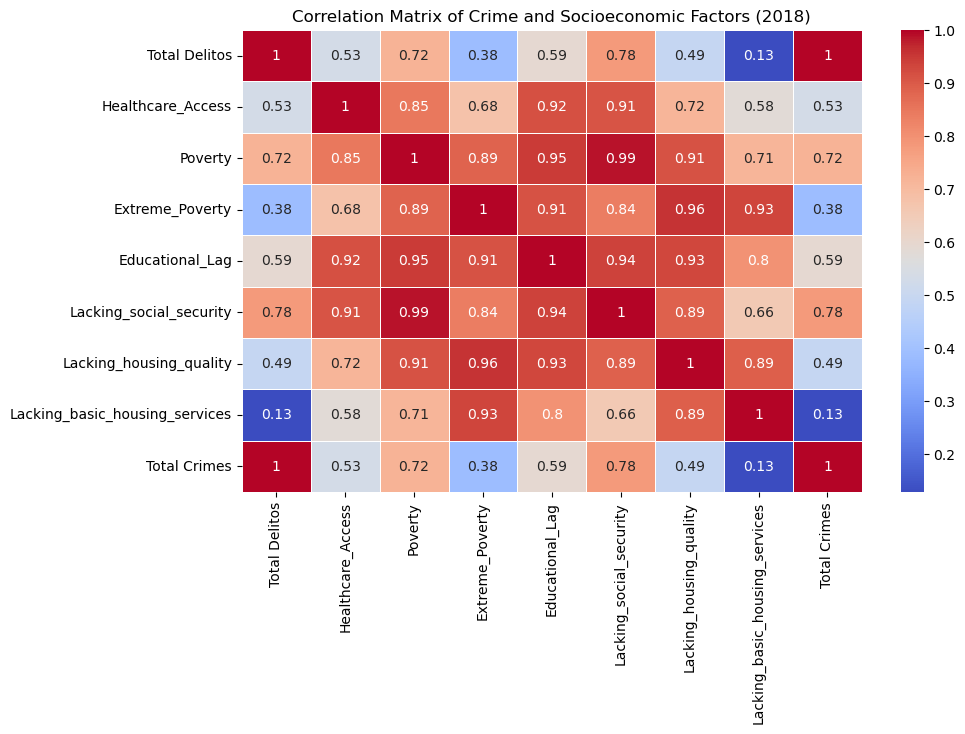

In [12]:
#Correlation Between Variables
plt.figure(figsize=(10, 6))
sns.heatmap(merged_df.drop(columns=["Entidad"]).corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Crime and Socioeconomic Factors (2018)")
plt.show()

#### *This matrix examines the relationships between crime rates and deficits in key social factors such as education, access to security, and hospital facilities. It displays data reflecting the total population that is poor in these aspects.*

#### *From the matrix, we can infer that states with greater shortages in these social services tend to have higher crime rates. The observed positive correlations suggest that lacking in quality education, adequate security, poverty and sufficient healthcare may be linked to increased criminal activity, guiding us toward the importance of strengthening these areas to improve public safety.*

#### *Although the matrix aggregates data, we can infer that states with similar socioeconomic profiles might form clusters, where high crime levels are associated with weaker economic conditions.*
